In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize
nltk.download('punkt')

df = pd.read_csv("drive/My Drive/AI Artathon/Arabic Poems Dataset/all_poems.csv", error_bad_lines=False);

df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
...,...,...,...,...,...,...,...,...,...
58016,86613,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لروح صهيل لا تحويه الاوقات ذنبك انك تمتد علي ا...,الوقت,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58017,86614,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اه لو اني ابني الشمس بعيني من طين هواء وسراب م...,الفلاح,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58018,86615,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,في عينيك يا امي لماذا الدمع منتظم كعقد الءلء ا...,أمّي,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58019,86616,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,النوم يوقظ طرفي الظامي علي لحن تموج من بعيد ار...,عن اللحن,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف


In [5]:
#saudi_tokens

df = df.loc[df['poet_cat'] == 'السعودية']

saudi_poems = df.poem_text.apply(lambda x: nltk.word_tokenize(x))

print('Total Number of Poems: ', len(saudi_poems))

saudi_tokens = saudi_poems.apply(lambda x: " ".join(x))

saudi_tokens = saudi_tokens.str.cat()

saudi_tokens = nltk.word_tokenize(saudi_tokens)
print('Total Number of Tokens: ', len(saudi_tokens))

print('Total Number of Unique Tokens: ', len(set(saudi_tokens)))


Total Number of Poems:  1931
Total Number of Tokens:  366306
Total Number of Unique Tokens:  83461


In [6]:
gulf_df = pd.read_csv("drive/My Drive/AI Artathon/Arabic Poems Dataset/gulf_poems.csv", error_bad_lines=False)
gulf_df.head(3)

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,173,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,يشهد اله انكم شهداء يشهد الانبياء والاولياء م...,شهداء,السعودية,19,http://www.adab.com/modules.php?name=Sh3er&doW...,غازي القصيبي
1,175,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,وقلت لي السحر في البحر واليل والبدر في الكاءنا...,مومياء,السعودية,19,http://www.adab.com/modules.php?name=Sh3er&doW...,غازي القصيبي
2,176,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,فقولي انه القمر او البحر الذي ما انفك بالامواج...,أغنية في ليل استوائي,السعودية,19,http://www.adab.com/modules.php?name=Sh3er&doW...,غازي القصيبي


In [7]:
!pip install PyArabic

     |████████████████████████████████| 126 kB 5.3 MB/s 


In [ ]:
import pyarabic.araby as araby
def poem_stats(gulf_df):
  # # gulf_df['poem_text'] = gulf_df['poem_text'].apply(lambda x: re.sub(r"[^\u0600-\u06ff]+$", '', str(x)))
  # # gulf_df['poem_text'] = gulf_df['poem_text'].apply(lambda x: re.sub(r'!\"#$%&\'\``\'\'()\*+,.-:;<=>?@\[\]^_`{|}~', '', str(x)))
  # gulf_df['poem_text'].replace(regex=True, inplace=True, to_replace=r'[^\u0600-\u06FF]+$', value=r'']
  # text = nltk.word_tokenize(clean.str.cat())

  text = gulf_df['poem_text'].apply(lambda x: nltk.word_tokenize(str(x)))
  print('Total Number of Poems: ', len(text))
  tokens = text.apply(lambda x: " ".join(x))
  tokens = tokens.str.cat()
  tokens = araby.strip_diacritics(tokens)
  tokens = nltk.word_tokenize(tokens)
  print('Total Number of Tokens: ', len(tokens))
  print('Total Number of Unique Tokens: ', len(set(tokens)))
  return tokens

tokens = poem_stats(gulf_df)


In [ ]:
path = 'drive/My Drive/AI Artathon/'

with open(path+"stopwords.txt", "r") as f:
  stopwords=[line.rstrip() for line in f]
print(stopwords)


['،', 'ء', 'ءَ', 'آ', 'آب', 'آذار', 'آض', 'آل', 'آمينَ', 'آناء', 'آنفا', 'آه', 'آهاً', 'آهٍ', 'آهِ', 'أ', 'أبدا', 'أبريل', 'أبو', 'أبٌ', 'أجل', 'أجمع', 'أحد', 'أخبر', 'أخذ', 'أخو', 'أخٌ', 'أربع', 'أربعاء', 'أربعة', 'أربعمئة', 'أربعمائة', 'أرى', 'أسكن', 'أصبح', 'أصلا', 'أضحى', 'أطعم', 'أعطى', 'أعلم', 'أغسطس', 'أفريل', 'أفعل به', 'أفٍّ', 'أقبل', 'أكتوبر', 'أل', 'ألا', 'ألف', 'ألفى', 'أم', 'أما', 'أمام', 'أمامك', 'أمامكَ', 'أمد', 'أمس', 'أمسى', 'أمّا', 'أن', 'أنا', 'أنبأ', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'أنتِ', 'أنشأ', 'أنه', 'أنًّ', 'أنّى', 'أهلا', 'أو', 'أوت', 'أوشك', 'أول', 'أولئك', 'أولاء', 'أولالك', 'أوّهْ', 'أى', 'أي', 'أيا', 'أيار', 'أيضا', 'أيلول', 'أين', 'أيّ', 'أيّان', 'أُفٍّ', 'ؤ', 'إحدى', 'إذ', 'إذا', 'إذاً', 'إذما', 'إذن', 'إزاء', 'إلى', 'إلي', 'إليكم', 'إليكما', 'إليكنّ', 'إليكَ', 'إلَيْكَ', 'إلّا', 'إمّا', 'إن', 'إنَّ', 'إى', 'إياك', 'إياكم', 'إياكما', 'إياكن', 'إيانا', 'إياه', 'إياها', 'إياهم', 'إياهما', 'إياهن', 'إياي', 'إيهٍ', 'ئ', 'ا', 'ا?', 'ا?ى', 'االا', 'االتى', 'اب

In [ ]:
# remove stop words

def remove_stopwords(text):
    new_list = [word for word in text if word not in stopwords]
    return new_list

print('Removing Stop Words ...')
# uq_tokens = set(tokens)
uq_tokens = remove_stopwords(tokens)
print('Total Number of Cleaned Tokens: ', len(uq_tokens))


Removing Stop Words ...
Total Number of Cleaned Tokens:  82596


In [ ]:
from collections import Counter
c = Counter(uq_tokens)

print(c)

Counter({')': 893, '(': 888, '``': 640, 'يا': 597, '*': 456, "''": 425, ',': 337, '-': 259, 'لي': 237, '--': 216, 'اليل': 213, 'انت': 211, 'انا': 203, 'حتي': 184, 'الارض': 159, '1': 155, '2': 155, 'كنت': 138, 'اني': 130, 'الموت': 128, 'الناس': 127, 'كلما': 126, '3': 124, '/': 124, 'اله': 122, 'الشعر': 120, 'وما': 117, 'الماء': 110, 'البحر': 110, 'الحب': 109, 'هذي': 106, '***': 104, 'ام': 100, 'الشمس': 98, 'القلب': 95, 'كي': 95, 'المدينة': 95, '«': 95, 'الطريق': 93, '4': 91, '»': 89, 'بلا': 87, 'اين': 85, '•': 84, 'الكلام': 82, 'ايها': 82, 'قلبي': 80, 'وجه': 77, 'فلا': 75, 'شيء': 74, 'سوي': 74, '–': 74, 'لنا': 73, 'ليل': 73, 'الريح': 73, '5': 73, 'اخر': 72, 'الحياة': 71, 'ابي': 70, 'قيل': 70, 'الحلم': 67, 'الروح': 67, 'ماء': 67, 'بي': 66, 'قلب': 66, 'وانت': 66, 'وانا': 66, 'قلت': 65, 'لك': 59, 'صوت': 57, '6': 57, 'دمي': 56, 'اليك': 55, 'العمر': 54, 'يدي': 54, 'البلاد': 54, 'الحزن': 53, 'الجسد': 53, 'ربما': 52, 'الزمان': 52, '_': 52, 'الصباح': 51, 'الرمل': 51, 'الظلام': 51, 'النار': 50, 

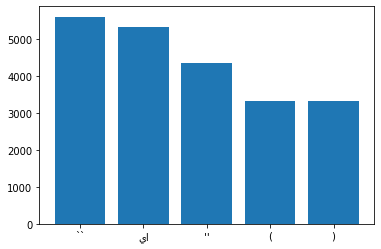

In [ ]:
import matplotlib.pyplot as plt

names = list(c.keys())
values = list(c.values())

all_values = c.values()
max_value = max(all_values)

most_common = dict(c.most_common(5));
plt.bar(most_common.keys(), most_common.values())
# plt.bar(range(max_value-max_value+10), values, tick_label=names)
plt.show()